1. DOWNLOADS AND IMPORTS

In [1]:
# Fundamental classes
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

#Performance Plot
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

# For the model and it's training
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

2. LOADING THE DATADET

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

3. DATA PROCESSING

In [3]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=10)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


4. BUILDING CNN MODEL

In [4]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [5]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

5. TRAINING THE MODEL

In [6]:
history = model.fit(X_train, y_train, batch_size=32, epochs=25 , validation_data=(X_test, y_test))

Epoch 1/25
981/981 [==============================] - 62s 62ms/step - loss: 1.7104 - accuracy: 0.5979 - val_loss: 0.3441 - val_accuracy: 0.9157
Epoch 2/25
981/981 [==============================] - 56s 57ms/step - loss: 0.4325 - accuracy: 0.8797 - val_loss: 0.1272 - val_accuracy: 0.9716
Epoch 3/25
981/981 [==============================] - 57s 58ms/step - loss: 0.2947 - accuracy: 0.9205 - val_loss: 0.1002 - val_accuracy: 0.9730
Epoch 4/25
981/981 [==============================] - 56s 58ms/step - loss: 0.2370 - accuracy: 0.9345 - val_loss: 0.0699 - val_accuracy: 0.9810
Epoch 5/25
981/981 [==============================] - 56s 58ms/step - loss: 0.2050 - accuracy: 0.9444 - val_loss: 0.0503 - val_accuracy: 0.9866
Epoch 6/25
981/981 [==============================] - 58s 59ms/step - loss: 0.2256 - accuracy: 0.9425 - val_loss: 0.0698 - val_accuracy: 0.9816
Epoch 7/25
981/981 [==============================] - 58s 60ms/step - loss: 0.1972 - accuracy: 0.9504 - val_loss: 0.0527 - val_accuracy:

6. PLOTTING THE PERFORMANCE CURVE

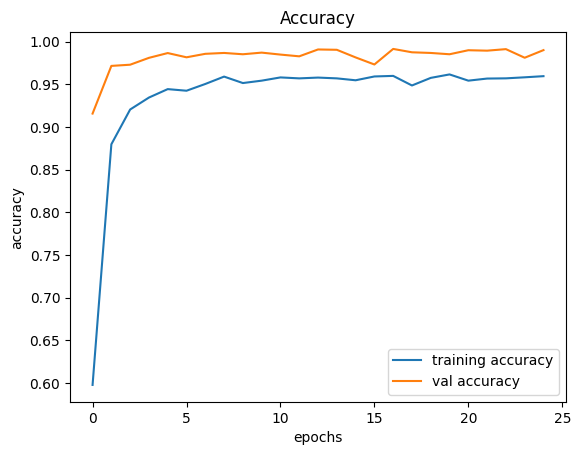

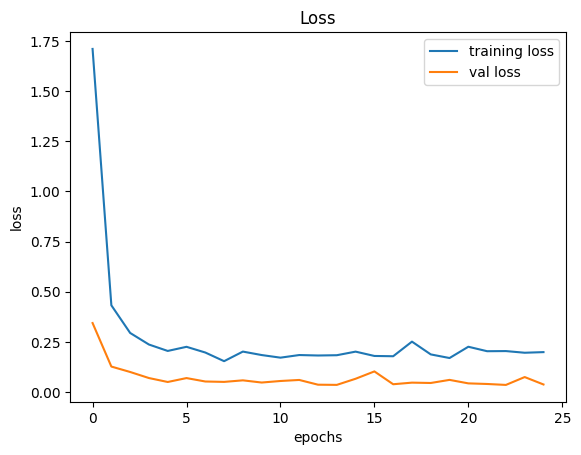

In [7]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#plotting graphs for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

7. LOADING THE TEST DATASET TO TEST THE MODEL

In [8]:
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

In [9]:
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

print(accuracy_score(labels, pred))

395/395 [==============================] - 5s 12ms/step
0.9604117181314331


8. SAVE THE MODEL

In [10]:
# Saving the Model 
model.save('traffic_classifier.h5')

9. LOAD THE MODEL

In [11]:
from keras.models import load_model
model2 = load_model('traffic_classifier.h5')

In [12]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [13]:
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test), axis=-1)
    return image,Y_pred

1/1 [==============================] - 0s 27ms/step
Predicted traffic sign is:  Speed limit (30km/h)


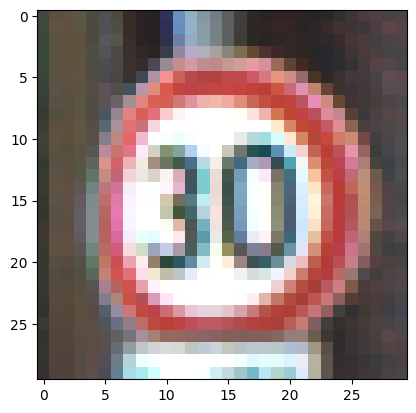

In [14]:
plot,prediction = test_on_img(r'C:\\Users\\prami\\OneDrive\Desktop\\Traffic_Sign_Classification_app\\Test\\00001.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 49ms/step
Predicted traffic sign is:  Keep right


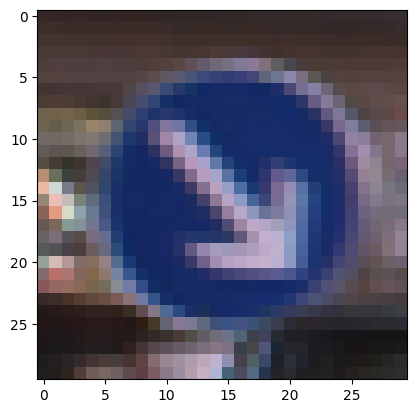

In [15]:
plot,prediction = test_on_img(r'C:\\Users\\prami\\OneDrive\Desktop\\Traffic_Sign_Classification_app\\Test\\00002.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 35ms/step
Predicted traffic sign is:  Turn right ahead


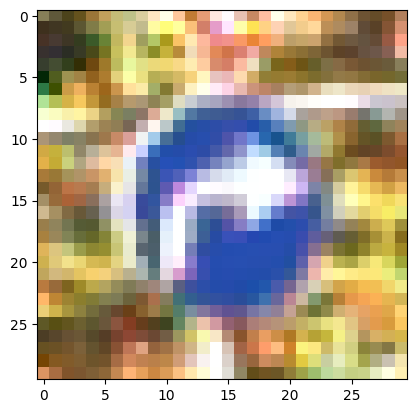

In [16]:
plot,prediction = test_on_img(r'C:\\Users\\prami\\OneDrive\Desktop\\Traffic_Sign_Classification_app\\Test\\00003.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()